# Simulation Analyser

## Import relevant libraries

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import quantstats as qs

## Get the data

In [24]:
config_file_name = "config_03_mix.ini"

### Simulation Results

In [25]:
file_import_sim_results = config_file_name.replace(".ini", ".csv")
fullpath_import_sim_results = os.path.join('../results', 'data', 'simul_results', 'sim_results_' + file_import_sim_results)

In [26]:
df_simulation_results = pd.read_csv(fullpath_import_sim_results)

FileNotFoundError: [Errno 2] No such file or directory: '../results/data/simul_results/sim_results_config_03_mix.csv'

In [ ]:
fig = px.box(df_simulation_results, y="fmt_total_profit_percentage", color="model_type", points="all", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600)
fig.show()

In [ ]:
fig = px.histogram(df_simulation_results, x="fmt_total_profit_percentage", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

In [27]:
fig = px.histogram(df_simulation_results, x="num_of_trades", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

### Robot Actions & Env data

In [28]:
sim_id = 2315

In [29]:
file_import_robot_actions_and_env = config_file_name.replace(".ini", "")
fullpath_import_robot_actions_and_env = os.path.join('../results', 'data', 'robot_actions_and_env', 'robot_actions_and_env_results_' + file_import_robot_actions_and_env + '_sim_id_' + str(sim_id) + ".csv")

In [30]:
df_robot_actions_and_env = pd.read_csv(fullpath_import_robot_actions_and_env)

FileNotFoundError: [Errno 2] No such file or directory: '../results/data/robot_actions_and_env/robot_actions_and_env_results_config_03_mix_sim_id_2315.csv'

In [31]:
fig = px.line(df_robot_actions_and_env, x="dates", y="prices", color_discrete_sequence=['#969696'])
fig.add_trace(go.Scatter(name='Hold', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 2]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 2]['prices'], mode='markers', marker_symbol='circle', marker_color='#0064c8'))
fig.add_trace(go.Scatter(name='Buy', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['prices'], mode='markers', marker_symbol='triangle-up', marker_size=10, marker_color='#228b22'))
fig.add_trace(go.Scatter(name='Sell', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['prices'], mode='markers', marker_symbol='triangle-down', marker_size=10, marker_color='#c83232'))

fig.show()

                           Strategy
-------------------------  ----------
Start Period               2022-10-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             44.0%

Cumulative Return          19.68%
CAGR﹪                     108.92%

Sharpe                     1.63
Prob. Sharpe Ratio         79.47%
Smart Sharpe               1.39
Sortino                    2.08
Smart Sortino              1.78
Sortino/√2                 1.47
Smart Sortino/√2           1.26
Omega                      1.62

Max Drawdown               -14.52%
Longest DD Days            49
Volatility (ann.)          34.65%
Calmar                     7.5
Skew                       -3.23
Kurtosis                   23.64

Expected Daily %           0.2%
Expected Monthly %         6.17%
Expected Yearly %          19.68%
Kelly Criterion            26.38%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.37%
Expected Shortfall (cVaR)  -3.37%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-11-11,2022-11-11,2022-12-30,49,-14.520718,-13.966809
2,2022-10-21,2022-10-26,2022-10-30,9,-5.576913,-2.325158
3,2022-10-08,2022-10-17,2022-10-20,12,-3.463613,-2.922107
4,2022-11-02,2022-11-02,2022-11-04,2,-0.034747,0.000000


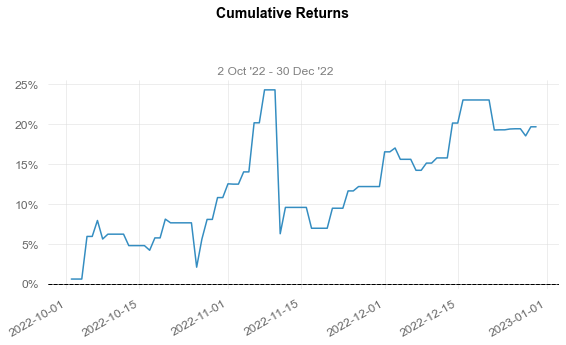

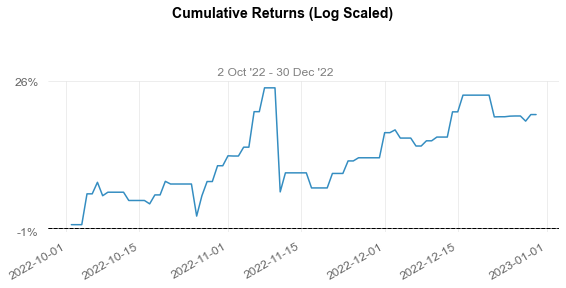

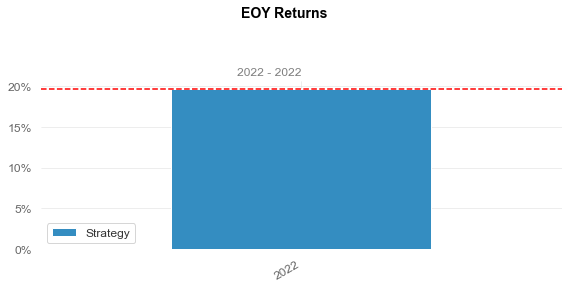

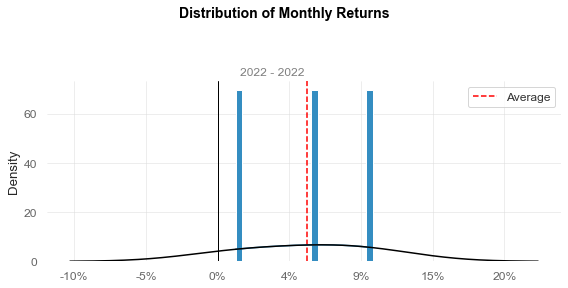

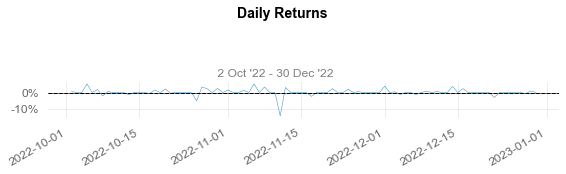

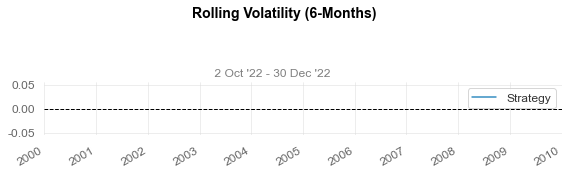

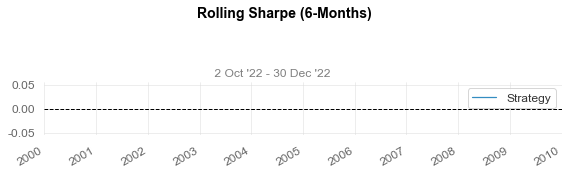

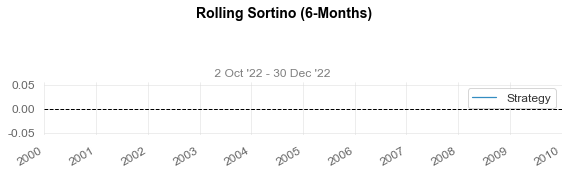

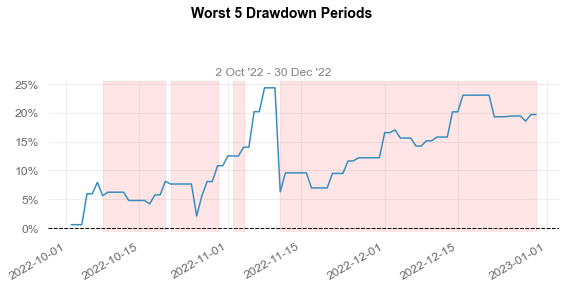

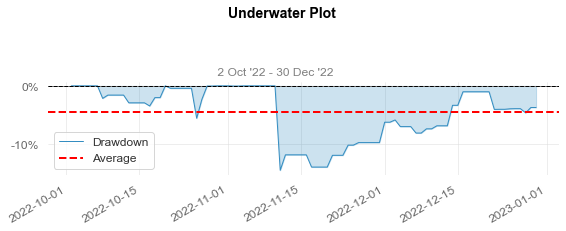

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



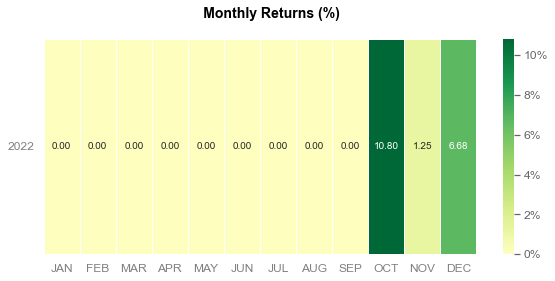

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



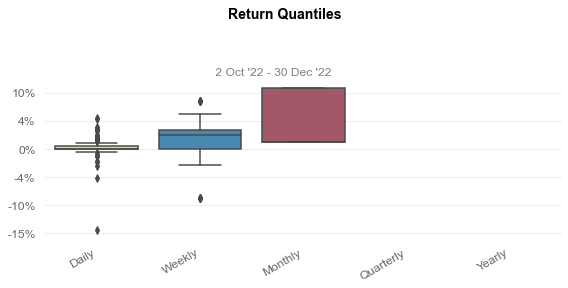

In [32]:
qs.extend_pandas()

df_temp = df_robot_actions_and_env.copy()
df_temp['Date'] = pd.to_datetime(df_temp['dates'])
df_temp.set_index('Date', inplace=True)

net_worth = pd.Series(df_temp['total_profit_percentage'], index=df_temp.index[6:])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)